In [3]:
from pathlib import Path
import os

In [6]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [1]:
import albumentations as A
import cv2

In [51]:
annos_p = r"F:\workspace\datasets\DeepFashion2 Dataset\train\annos"
imgs_p  = r"F:\workspace\datasets\DeepFashion2 Dataset\train\image"
anno_imgs = list_anno_img_paths(annos_p, imgs_p)

In [70]:
anno, img = anno_imgs[0]
items = load_items(anno)
bboxes = [i["bounding_box"] for i in items]
category_ids = [i["category_id"] for i in items]
cat_names = [i["category_name"] for i in items]

category_id_to_name  = { k:v for (k, v) in zip(category_ids, cat_names)}

In [71]:
image = cv2.imread(str(img))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [72]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

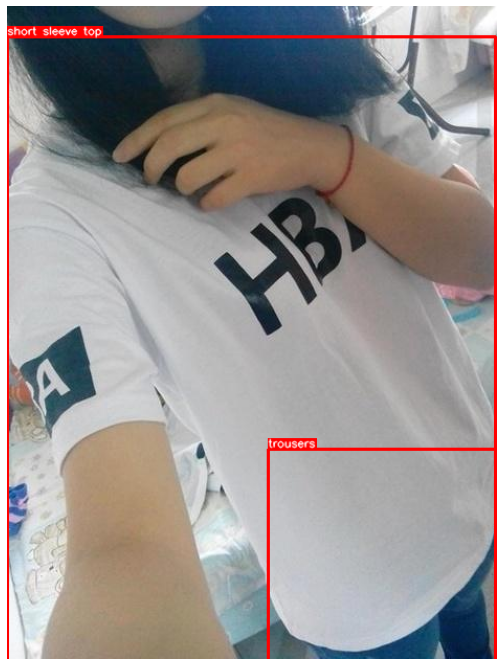

In [73]:
visualize(image, bboxes, category_ids, category_id_to_name)


In [74]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

In [76]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

ValueError: Expected x_max for bbox (0.532051282051282, 0.6778846153846154, 1.5277777777777777, 1.6762820512820513, 8) to be in the range [0.0, 1.0], got 1.5277777777777777.

In [1]:
x1, y1, x2, y2 = [249, 423, 466, 623]

In [3]:
x1, x2

(249, 466)